# Описание данных

1. Данные для первой части. 

Файл /datasets/hypothesis.csv 
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


2. Данные для второй части. 

Файл /datasets/orders.csv
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# Описание проекта

Контекст:

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 


## Приоритизация гипотез

### Применение фреймворка ICE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
pd.options.display.max_colwidth = 130
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
data['ICE'] = (data['Impact'] * data['Confidence']) / data['Efforts']
data.sort_values(by='ICE', ascending=False)[['Hypothesis', 'ICE']].round(2)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


### Применение фреймворка RICE

In [4]:
data['RICE'] = (data['Reach'] * data['Impact'] * data['Confidence']) / data['Efforts']
data.sort_values(by='RICE', ascending=False)[['Hypothesis', 'RICE']]

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Какие изменения приоритизации гипотез при применении RICE вместо ICE возникли и почему:

1. При применении разных фреймворков возникли следующие изменения в приоритетах гипотез:

  - Гипотезы 0, 7 и 6 остались в первой четверке гипотез, но поменялся их порядок:
  
  0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
  
  7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
  
  6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
  
  - Также гипотезы 3, 1 и 5 остались в последней четверке гипотез, но с разным их порядком:
  
  3 - Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
  
  1 - Запустить собственную службу доставки, что сократит срок доставки заказов
  
  5 - Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
  
  - Гипотеза номер 4 осталась на последнем, 9-ом месте:
  
  4 - Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
  
  - Гипотеза номер 6 осталась на 4-ом месте:
  
  6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
  
  
2. Лидеры(сверху вниз):

  - по ICE: 8, 0, 7; 
  - по RICE: 7, 2, 0.
  
  0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
  
  7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
  
  8 - Запустить акцию, дающую скидку на товар в день рождения
  
  2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	
  
  
3. Почему: Данные изменения связаны с параметром Reach.

- Например, Reach у гипотезы 7(Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок) равен 10, а у гипотезы 8(Запустить акцию, дающую скидку на товар в день рождения) равен 1. 

- Также у гипотезы 2(Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа) Reach=8, у гипотезы 0(Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей) Reach=3.

## Анализ A/B-теста

### Кумулятивная выручка по группам

График

In [5]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Проведем предобработку данных:

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
# Приведем поле date в обоих датафреймах к типу datetime
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [10]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [11]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [12]:
orders.duplicated().sum()

0

In [13]:
visitors.duplicated().sum()

0

Дубликатов и пропусков нет.

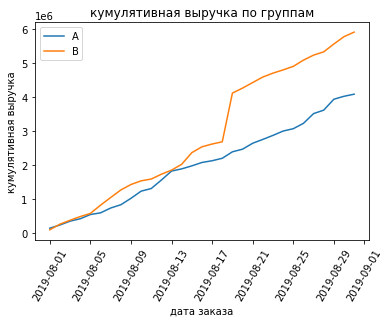

In [15]:
dates_groups = orders[['date', 'group']].drop_duplicates()

orders_aggregated = dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1
).sort_values(by=['date', 'group'])

visitors_aggregated = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1
).sort_values(by=['date', 'group'])

cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

cumulative_data.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulative_revenue_A = cumulative_data[cumulative_data['group'] == 'A'][['date', 'revenue', 'orders']]
cumulative_revenue_B = cumulative_data[cumulative_data['group'] == 'B'][['date', 'revenue', 'orders']]

plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')

plt.legend()
plt.xlabel('дата заказа')
plt.ylabel('кумулятивная выручка')
#plt.figure(figsize=(30, 10)) не работает почему-то; изменить масштаб, 
# чтобы были видны даты по оси абсцисс, не получается; с чем это может быть связано?
# Для решения этой проблемы решил повернуть подписи дат.
plt.xticks(rotation=60)
plt.title('кумулятивная выручка по группам')
plt.show()

Выводы и предположения
- Выручка в обеих группах с течением времени растет.
- В группе "B" близко к середине теста наблюдается резкий скачок выручки. Возможно, это связано с аномально большими заказами и/или увеличением количества заказов.
- Выручка группы "B" выше группы "A".

### Кумулятивный средний чек по группам

График

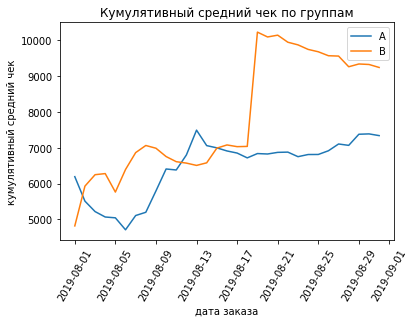

In [16]:
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], label='B')

plt.legend()
plt.xlabel('дата заказа')
plt.ylabel('кумулятивный средний чек')
plt.xticks(rotation=60)
plt.title('Кумулятивный средний чек по группам')
plt.show()

Выводы и предположения
- Группа "A": в первой половине теста наблюдаются колебания, после середины теста происходит стабилизация и небольшое увеличение к концу теста показателей среднего чека.
- Группа "B": в первой половине теста наблюдаются колебания, близко к середине теста резкий скачок(возможно, аномально большие заказы) и к концу теста снижение показателей среднего чека.

### Относительное изменение кумулятивного среднего чека группы B к группе A

График

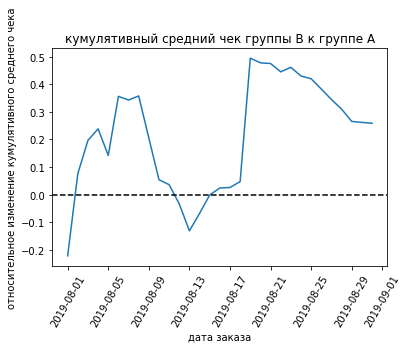

In [18]:
merged_cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, right_on='date', left_on='date', how='left', suffixes=['A', 'B'])

plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA']) - 1)

plt.axhline(y=0, color='black', linestyle='--')

plt.xlabel('дата заказа')
plt.ylabel('относительное изменение кумулятивного среднего чека')
plt.xticks(rotation=60)
plt.title('кумулятивный средний чек группы B к группе A')
plt.show()

Выводы и предположения
- Наблюдаются колебания относительного различия кумулятивного среднего чека группы B к группе A. Вероятно, они вызваны аномально большими заказами.

### Кумулятивное среднее количество заказов на посетителя по группам

График

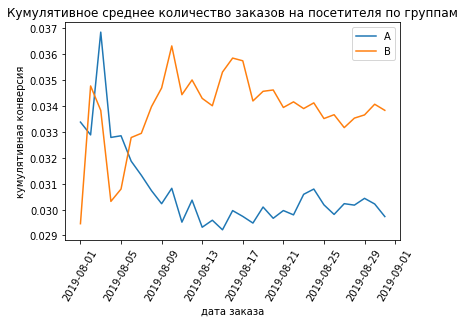

In [19]:
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

cumulative_data_A = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_B = cumulative_data[cumulative_data['group'] == 'B']

plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')

plt.legend()
plt.xlabel('дата заказа')
plt.ylabel('кумулятивная конверсия')
plt.xticks(rotation=60)
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.show()

Выводы и предположения
- В обеих группах наблюдаются колебания показателей кумулятивного среднего количества заказов на посетителя, особенно резкие колебания в начале теста у группы "B".
- В обеих группах к концу теста наблюдается понижение показателей.
- Количество заказов группы "B" на протяжении большей части теста больше количества заказов группы "A".

### Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A

График

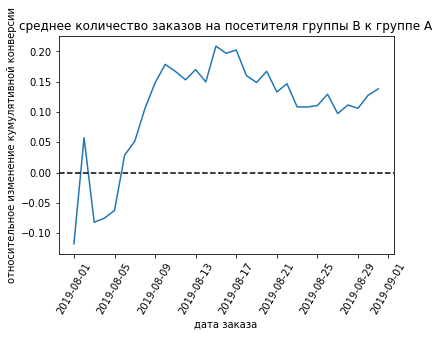

In [21]:
merged_cumulative_conversions = cumulative_data_A[['date', 'conversion']]\
.merge(cumulative_data_B[['date', 'conversion']], right_on='date', left_on='date',\
       how='left', suffixes=['A', 'B'])

plt.plot(merged_cumulative_conversions['date'],\
         merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA'] - 1)

plt.axhline(y=0, color='black', linestyle='--')

plt.xlabel('дата заказа')
plt.ylabel('относительное изменение кумулятивной конверсии')
plt.xticks(rotation=60)
plt.title('среднее количество заказов на посетителя группы B к группе A')
plt.show()

Выводы и предположения
- Большую часть теста конверсия группы "B" больше конверсии группы "A" на 10-20%.

### Количество заказов по пользователям

График

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


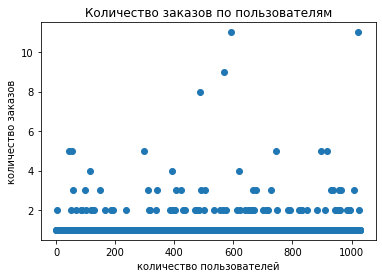

In [22]:
orders_by_users = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

orders_by_users.columns = ['visitorId', 'orders']

display(orders_by_users.sort_values(by='orders', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в orders_by_users
x_values = pd.Series(range(0, len(orders_by_users)))

plt.scatter(x_values, orders_by_users['orders'])

plt.xlabel('количество пользователей')
plt.ylabel('количество заказов')
plt.title('Количество заказов по пользователям')
plt.show()

Выводы и предположения
- Количество пользователей, сделавших 8 и более заказов, очень мало. Вероятно, такие пользователи являются аномальными.

### 95-й и 99-й перцентили количества заказов на пользователя

In [20]:
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

Выводы
- Не более 5% пользователей совершали больше 2 заказов.
- И не более 1% пользователей -- более 4 заказов.

Можно выбрать такую границу для определения аномальных пользователей -- пользователи, совершившие 4 и более заказов, будут аномальными. 

### Стоимости заказов

График

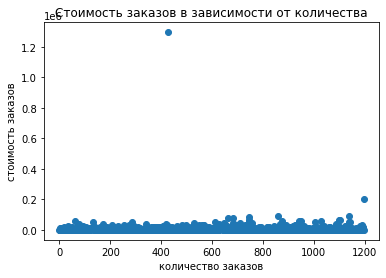

In [23]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])

plt.xlabel('количество заказов')
plt.ylabel('стоимость заказов')
plt.title('Стоимость заказов в зависимости от количества')
plt.show()

Выводы и предположения
- Заказов стоимостью свыше 50 000 мало. Вероятно, такие заказы являются аномальными. Особенно аномальным выглядит заказ на сумму в 1 200 000.

### 95-й и 99-й перцентили стоимости заказов

In [22]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Выводы
- Не более 5% заказов имеют чек дороже 28 000.
- Не более 1% заказов -- дороже 58 234.

Можно выбрать такую границу для определения аномальных заказов -- заказы, которые имеют чек дороже 28 000, будут аномальными.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

In [23]:
# Подготовка данных
visitorsA_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsA_daily.columns = ['date', 'visitors_per_dateA']

visitorsA_cummulative = visitorsA_daily.apply(
    lambda x: visitorsA_daily[visitorsA_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_dateA': 'sum'}
    ),
    axis=1
)
visitorsA_cummulative.columns = ['date', 'visitors_cummulativeA']

visitorsB_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsB_daily.columns = ['date', 'visitors_per_dateB']

visitorsB_cummulative = visitorsB_daily.apply(
    lambda x: visitorsB_daily[visitorsB_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_dateB': 'sum'}
    ),
    axis=1
)
visitorsB_cummulative.columns = ['date', 'visitors_cummulativeB']

ordersA_daily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersA_daily.columns = ['date', 'orders_per_dateA', 'revenue_per_dateA']

ordersA_cummulative = ordersA_daily.apply(
    lambda x: ordersA_daily[ordersA_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_dateA': 'sum', 'revenue_per_dateA': 'sum'}
    ),
    axis=1
).sort_values(by=['date'])
ordersA_cummulative.columns = [
    'date',
    'orders_cummulativeA',
    'revenue_cummulativeA',
]

ordersB_daily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersB_daily.columns = ['date', 'orders_per_dateB', 'revenue_per_dateB']

ordersB_cummulative = ordersB_daily.apply(
    lambda x: ordersB_daily[ordersB_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_dateB': 'sum', 'revenue_per_dateB': 'sum'}
    ),
    axis=1
).sort_values(by=['date'])
ordersB_cummulative.columns = [
    'date',
    'orders_cummulativeB',
    'revenue_cummulativeB',
]

data = (
    ordersA_daily.merge(
        ordersB_daily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersA_cummulative, left_on='date', right_on='date', how='left')
    .merge(ordersB_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsA_daily, left_on='date', right_on='date', how='left')
    .merge(visitorsB_daily, left_on='date', right_on='date', how='left')
    .merge(visitorsA_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsB_cummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  orders_per_dateA  revenue_per_dateA  orders_per_dateB  \
0 2019-08-01                24             148579                21   
1 2019-08-02                20              93822                24   
2 2019-08-03                24             112473                16   
3 2019-08-04                16              70825                17   
4 2019-08-05                25             124218                23   

   revenue_per_dateB  orders_cummulativeA  revenue_cummulativeA  \
0             101217                   24                148579   
1             165531                   44                242401   
2             114248                   68                354874   
3             108571                   84                425699   
4              92428                  109                549917   

   orders_cummulativeB  revenue_cummulativeB  visitors_per_dateA  \
0                   21                101217                 719   
1                   45            

H_0: Статистическая значимость различий в среднем количестве заказов на посетителя между группами нет.

H_1: Статистическая значимость различий в среднем количестве заказов на посетителя между группами есть.

In [24]:
alpha = .05

In [25]:
orders_by_visitorsA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
orders_by_visitorsA.columns = ['visitorId', 'orders']

orders_by_visitorsB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
orders_by_visitorsB.columns = ['visitorId', 'orders']

sampleA = pd.concat([orders_by_visitorsA['orders'], pd.Series(0, index=np.arange(data['visitors_per_dateA'].sum() - len(orders_by_visitorsA['orders'])), name='orders')], axis=0)
sampleB = pd.concat([orders_by_visitorsB['orders'], pd.Series(0, index=np.arange(data['visitors_per_dateB'].sum() - len(orders_by_visitorsB['orders'])), name='orders')], axis=0) 

p_value = "{:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])
display(p_value)
display("{:.3f}".format((data['orders_per_dateB'].sum()/data['visitors_per_dateB'].sum())/(data['orders_per_dateA'].sum()/data['visitors_per_dateA'].sum()) - 1))

if float(p_value) < alpha:
    display('Отвергаем нулевую гипотезу: между группами есть значимая разница')
else:
    display('Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными')

'0.01679'

'0.138'

'Отвергаем нулевую гипотезу: между группами есть значимая разница'

Выводы и предположения
- P-value меньше 0.05, потому нулевую гипотезу отвергаем. Анализ "сырых данных" сообщает, что в среднем количестве заказов на посетителя между группами есть статистически значимые различия. 
- Относительный прирост конверсии группы "B" к конверсии группы "A" равен 13.8%.

### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

H_0: Статистическая значимость различий в среднем чеке заказа между группами нет.

H_1: Статистическая значимость различий в среднем чеке заказа между группами есть.

In [26]:
p_value = "{:.3f}".format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1])
display(p_value)
display("{:.3f}".format(orders[orders['group'] == 'B']['revenue'].mean()/orders[orders['group'] == 'A']['revenue'].mean()-1))

if float(p_value) < alpha:
    display('Отвергаем нулевую гипотезу: между группами есть значимая разница')
else:
    display('Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными')

'0.729'

'0.259'

'Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными'

Выводы и предположения
- P-value больше 0.05 -- статистически значимых отличий в среднем чеке между группами нет.
- Относительное различие среднего чека между сегментами равняется 25.9%.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

H_0: Статистическая значимость различий в среднем количестве заказов на посетителя между группами нет.

H_1: Статистическая значимость различий в среднем количестве заказов на посетителя между группами есть.

In [27]:
# Формирование аномальных пользователей

visitors_with_many_orders = pd.concat(
    [
        orders_by_visitorsA[orders_by_visitorsA['orders'] > 3]['visitorId'],
        orders_by_visitorsB[orders_by_visitorsB['orders'] > 3]['visitorId']
    ],
    axis=0
)

visitors_with_expensive_orders = orders[orders['revenue'] > 28000]['visitorId']

abnormal_visitors = (
    pd.concat([visitors_with_many_orders, visitors_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

display(abnormal_visitors.head())

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitorId, dtype: int64

In [28]:
sampleA_filtered = pd.concat(
    [
        orders_by_visitorsA[
            np.logical_not(orders_by_visitorsA['visitorId'].isin(abnormal_visitors))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(data['visitors_per_dateA'].sum() - len(orders_by_visitorsA['orders'])),
            name='orders'
        )
    ],
    axis=0
)

sampleB_filtered = pd.concat(
    [
        orders_by_visitorsB[
            np.logical_not(orders_by_visitorsB['visitorId'].isin(abnormal_visitors))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(data['visitors_per_dateB'].sum() - len(orders_by_visitorsB['orders'])),
            name='orders'
        )
    ],
    axis=0
)

p_value = "{:.5f}".format(stats.mannwhitneyu(sampleA_filtered, sampleB_filtered)[1])
display(p_value)
display("{:.3f}".format(sampleB_filtered.mean()/sampleA_filtered.mean()-1))

if float(p_value) < alpha:
    display('Отвергаем нулевую гипотезу: между группами есть значимая разница')
else:
    display('Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными')

'0.01794'

'0.148'

'Отвергаем нулевую гипотезу: между группами есть значимая разница'

Выводы и предположения
- P-value меньше 0.05, потому нулевую гипотезу отвергаем. Анализ "очищенных данных" сообщает, что в среднем количестве заказов на посетителя между группами есть статистически значимые различия(P-value по "очищенным данным" -- 0.01794, по "сырым данным" -- 0.01679). 
- Относительный прирост конверсии группы "B" к конверсии группы "A" равен 14.8%(по "сырым данным" -- 13.8%).

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

H_0: Статистическая значимость различий в среднем чеке заказа между группами нет.

H_1: Статистическая значимость различий в среднем чеке заказа между группами есть.

In [29]:
p_value = '{:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormal_visitors))
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormal_visitors))
                )
            ]['revenue']
        )[1]
    )

display(p_value)

display(
    '{:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormal_visitors))
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormal_visitors))
            )
        ]['revenue'].mean()
        - 1
    )
)

if float(p_value) < alpha:
    display('Отвергаем нулевую гипотезу: между группами есть значимая разница')
else:
    display('Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными')

'0.977'

'-0.017'

'Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными'

Выводы и предположения
- P-value больше 0.05 -- статистически значимых отличий в среднем чеке между группами нет.  Но P-value сильно вырос после удаления аномальных данных с 0.729 до 0.977 .
- Относительное различие среднего чека между сегментами равняется -1.7%. Относительный прирост среднего чека после удаления аномальных пользователей превратился из положительного(25.9%) в отрицательный(-1.7%).

###  Решение по результатам теста и его объяснение

Решение: 

Тест необходимо остановить и зафиксировать победу группы "B".

Объяснение:
- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий(P-value по "очищенным данным" -- 0.01794, по "сырым данным" -- 0.01679).
- Нет статистически значимого различия по среднему чеку между группами как по сырым данным, так и после фильтрации аномалий. Но P-value сильно вырос после удаления аномальных данных с 0.729 до 0.977 .
- После удаления аномальных данных относительный прирост конверсии группы "B" к конверсии группы "A" вырос на 1%(с 13.8% до 14.8%).
- Относительный прирост среднего чека после удаления аномальных пользователей превратился из положительного(25.9%) в отрицательный(-1.7%).

Таким образом, можно сделать вывод, что конверсия группы "B" увеличилась на 14.8%. Это очень значимое отличие от группы "A". Поэтому группа "B" побеждает в тесте.